In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv
/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv
/kaggle/input/child-mind-institute-problematic-internet-use/train.csv
/kaggle/input/child-mind-institute-problematic-internet-use/test.csv
/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id=00115b9f/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/id=001f3379/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=0745c390/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=eaab7a96/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=8ec2cc63/part-0.parquet
/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=b2987a65/part-0.parquet
/kaggle/input/child-mind-institute-problematic-intern

In [2]:
# packages

## Inspect Dataset

In [3]:
data_path = "/kaggle/input/child-mind-institute-problematic-internet-use/"
import os
import pandas as pd
print(os.listdir(data_path))
print(f"# of .parquet files for train : {len(os.listdir(data_path+'series_train.parquet'))}")
df_train = pd.read_csv(data_path+"train.csv")
print(df_train.head())
print(df_train.shape)

['sample_submission.csv', 'data_dictionary.csv', 'series_test.parquet', 'series_train.parquet', 'train.csv', 'test.csv']
# of .parquet files for train : 996
         id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347        

In [4]:
target_cols = ["sii"]
feature_cols = list(df_train.columns)
feature_cols.remove('sii')
print(feature_cols)

['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season', 'PAQ_C-PAQ_C

In [5]:
df_sample_parquet = pd.read_parquet(data_path+"series_train.parquet/id=ee67eb55/part-0.parquet")
print(df_sample_parquet.head())
print(df_sample_parquet.shape)

   step         X         Y         Z      enmo     anglez  non-wear_flag  \
0     0 -0.102485  0.015420  0.993102  0.000713  84.117256            0.0   
1     1 -0.102146  0.015122  0.994594  0.001267  84.122902            0.0   
2     2  0.087173 -0.193247  0.879646  0.021600  70.200447            0.0   
3     3 -0.056914  0.022769  0.988574  0.015040  85.323189            0.0   
4     4 -0.075100  0.013979  0.997422  0.001520  85.634636            0.0   

       light  battery_voltage     time_of_day  weekday  quarter  \
0  15.500000      4202.000000  45240000000000        4        2   
1   8.750000      4202.166504  45245000000000        4        2   
2  10.500000      4202.333496  45250000000000        4        2   
3  10.666667      4202.500000  45255000000000        4        2   
4   9.666667      4202.666504  45260000000000        4        2   

   relative_date_PCIAT  
0                 13.0  
1                 13.0  
2                 13.0  
3                 13.0  
4        

## Data Cleaning

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [7]:
df_train1 = df_train.dropna(thresh = 50)
df_train1 = df_train1.dropna(axis =1, thresh = 200)
df_train1 = df_train1[df_train1["sii"].notnull()]
print(df_train1.info())
print(df_train1.shape)




<class 'pandas.core.frame.DataFrame'>
Index: 2158 entries, 0 to 3958
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2158 non-null   object 
 1   Basic_Demos-Enroll_Season               2158 non-null   object 
 2   Basic_Demos-Age                         2158 non-null   int64  
 3   Basic_Demos-Sex                         2158 non-null   int64  
 4   CGAS-Season                             1872 non-null   object 
 5   CGAS-CGAS_Score                         1872 non-null   float64
 6   Physical-Season                         2157 non-null   object 
 7   Physical-BMI                            2147 non-null   float64
 8   Physical-Height                         2150 non-null   float64
 9   Physical-Weight                         2147 non-null   float64
 10  Physical-Waist_Circumference            468 non-null    float64
 

In [8]:
def fillMissingValuesNum(df):
    df = df.reset_index(drop= True)
    float_cols = df.select_dtypes(include= ["float"]).columns
    float_cols = [col for col in float_cols if df[col].isnull().any()]
    sii_value = [int(x) for x in df["sii"].unique()]
    for i in float_cols:
        for sii in sii_value:
            col_mean = float(df.loc[df["sii"] == sii, i].mean())
            col_median = float(df.loc[df["sii"] == sii, i].median())
            df.loc[df["sii"] == sii , i] = df.loc[df["sii"] == sii , i].fillna(col_median)
    return df
        
df_train1 = fillMissingValuesNum(df_train1.copy())
df_train1.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,44.0,62.0,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,65.0,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0


In [9]:
def fillMissingValuesCat(df):
    object_cols = df.select_dtypes(include= ["object"]).columns
    object_cols = [x for x in object_cols if ((df[x].isnull()) | (df[x] == 'nan')).any()]
    print(object_cols)
    sii_values = df["sii"].unique()
    for i in object_cols:
        for sii in sii_values:
            mode_ = df.loc[df["sii"] == sii , i].mode()
            print(i, sii, mode_[0])
            df.loc[df["sii"] == sii, i ] = df.loc[df["sii"] == sii, i ].fillna(mode_)
    df[object_cols] = df[object_cols].astype(str)
    return df
df_train1 = fillMissingValuesCat(df_train1.copy())
print(df_train1.info())
print(df_train1.head())

['CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season']
CGAS-Season 2.0 Spring
CGAS-Season 0.0 Spring
CGAS-Season 1.0 Spring
CGAS-Season 3.0 Spring
Physical-Season 2.0 Winter
Physical-Season 0.0 Spring
Physical-Season 1.0 Spring
Physical-Season 3.0 Spring
Fitness_Endurance-Season 2.0 Winter
Fitness_Endurance-Season 0.0 Spring
Fitness_Endurance-Season 1.0 Spring
Fitness_Endurance-Season 3.0 Spring
FGC-Season 2.0 Winter
FGC-Season 0.0 Summer
FGC-Season 1.0 Summer
FGC-Season 3.0 Spring
BIA-Season 2.0 Summer
BIA-Season 0.0 Summer
BIA-Season 1.0 Summer
BIA-Season 3.0 Spring
PAQ_A-Season 2.0 Winter
PAQ_A-Season 0.0 Summer
PAQ_A-Season 1.0 Spring
PAQ_A-Season 3.0 Fall
PAQ_C-Season 2.0 Winter
PAQ_C-Season 0.0 Winter
PAQ_C-Season 1.0 Spring
PAQ_C-Season 3.0 Winter
SDS-Season 2.0 Winter
SDS-Season 0.0 Spring
SDS-Season 1.0 Spring
SDS-Season 3.0 Spring
PreInt_EduHx-Season 2.0 Winter
PreInt_EduH

In [10]:
def labelEncoding(df):
    object_cols = list(df.select_dtypes(include = "object").columns)
    print(">>",object_cols)
    object_cols.remove("id")
    label_encoder_map = {}
    for col in object_cols:
        label_encoder_map[col] = {}
        col_new_values = []
        int_ = 0
        for _, row in df.iterrows():
            try:
                col_new_values.append(label_encoder_map[col][row[col]])
            except:
                label_encoder_map[col][row[col]] = int_
                int_+=1
                col_new_values.append(label_encoder_map[col][row[col]])
        df.drop(col, axis = 1, inplace = True)
        df[col] = col_new_values
    return df, label_encoder_map

df_train1, label_encoder_map = labelEncoding(df_train1.copy())
                
            
        

>> ['id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']


### Random Forest

In [11]:
variables = list(df_train1.columns)
variables.remove("sii")
variables.remove("id")
target = "sii"
X = df_train1[variables]
y = df_train1[target]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape , X_test.shape)

(1510, 80) (648, 80)


In [13]:
from sklearn.ensemble import RandomForestClassifier as rf
clf = rf(n_estimators = 100)
clf.fit(X_train, y_train)


RandomForestClassifier()

In [14]:
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL: 1.0


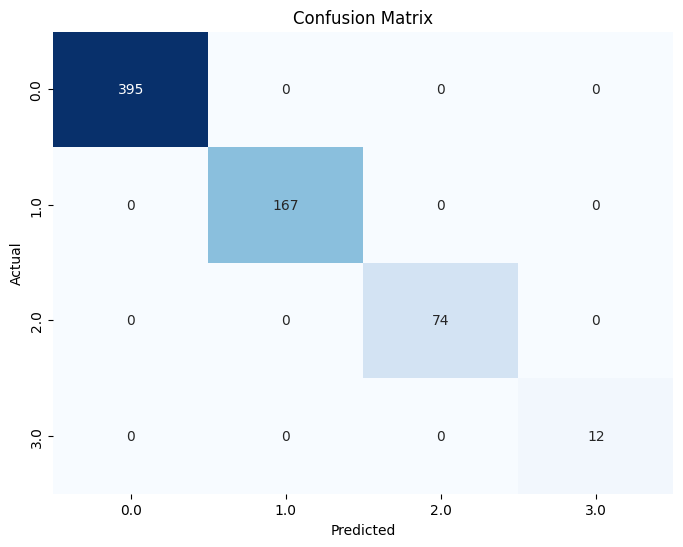

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Extract the unique class labels
    class_labels = sorted(set(y_test))

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
                xticklabels=[f'{label}' for label in class_labels],
                yticklabels=[f'{label}' for label in class_labels])
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Usage
plot_confusion_matrix(y_test, y_pred)
